In [69]:
import json
with open('output2.json', 'r') as f:
    scores_per_model2 = json.load(f)


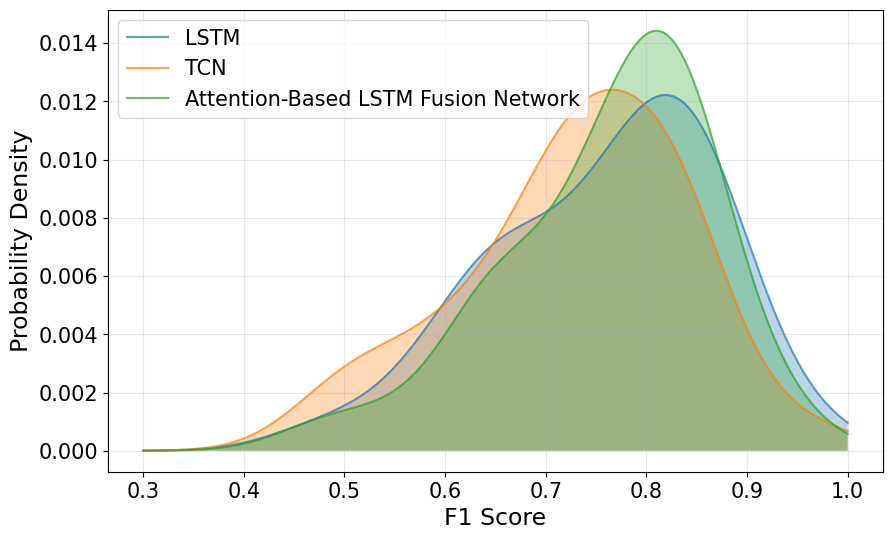

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.preprocessing import MinMaxScaler

scores_plot = scores_per_model2

# Define readable labels for models
models = {
    "StressClassifierWithFusion_two": "Attention-Based LSTM Fusion Network",
    "SimpleLSTM": "LSTM",
    "TCN_net": "TCN"
}

plt.figure(figsize=(10, 6))

for model_name, scores in zip(scores_plot["model_type"], scores_plot["scores_05"]):
    if model_name in models.keys():
        df_plots = pd.DataFrame(scores) 
        f1_vals = df_plots['f1_test'].values.reshape(-1, 1) 
        f1_norm = MinMaxScaler().fit_transform(f1_vals).flatten() 
        f1_vals = df_plots['f1_test'].dropna() 
        kde = gaussian_kde(f1_vals) 
        x = np.linspace(0.3, 1, 200) 
        y = kde(x) 
        y /= y.sum() 
        plt.plot(x, y, label=models[model_name], alpha=0.7) 
        plt.fill_between(x, y, alpha=0.3)

# plt.title('F1 Score Distribution Across Models')
plt.xlabel('F1 Score', fontsize=17)
plt.ylabel('Probability Density',fontsize=17)
# plt.xlim(0.3, 1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(True, alpha=0.3)
plt.show()


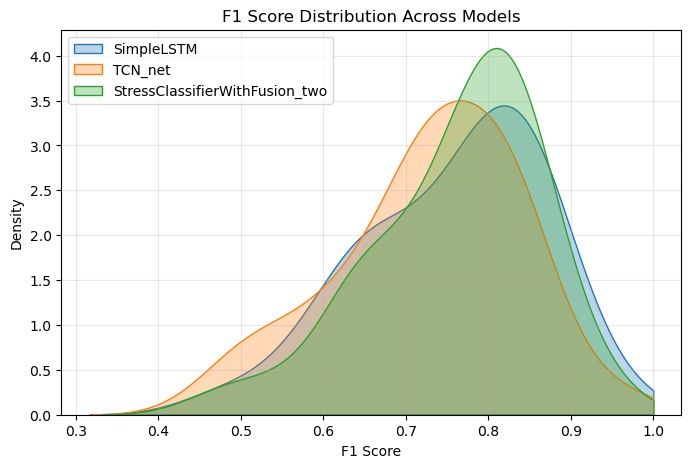

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for model_name, scores in zip(scores_plot["model_type"], scores_plot["scores_05"]):
    if model_name in ["StressClassifierWithFusion_two", "SimpleLSTM", "TCN_net"]:
        df_plots = pd.DataFrame(scores)

        sns.kdeplot(
            df_plots['f1_test'], 
            fill=True, 
            label=model_name, 
            alpha=0.3,
            clip=(0, 1)
        )

plt.title('F1 Score Distribution Across Models')
plt.xlabel('F1 Score')
plt.ylabel('Density')
# plt.ylim(0, 5)  # optional: adjust based on your preferred max
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [71]:
df_plots

,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train,test_name,threshold
0,0.710843,0.692308,0.642857,0.750000,0.842632,0.833460,0.810751,0.857477,S03_d1.pth,0.5
1,0.666667,0.650602,0.586957,0.729730,0.720989,0.735124,0.798375,0.681159,S04_d1.pth,0.5
2,0.615385,0.653465,0.687500,0.622642,0.768651,0.775964,0.826183,0.731500,S05_d1.pth,0.5
3,0.542056,0.558559,0.659574,0.484375,0.713564,0.736563,0.820399,0.668272,S06_d1.pth,0.5
4,0.723404,0.717391,0.785714,0.660000,0.783842,0.784692,0.807806,0.762865,S07_d1.pth,0.5
5,0.806818,0.813187,0.860465,0.770833,0.799713,0.787048,0.761238,0.814669,S08_d1.pth,0.5
6,0.733333,0.636364,0.512195,0.840000,0.804231,0.799265,0.799853,0.798677,S09_d1.pth,0.5
7,0.847059,0.850575,0.860465,0.840909,0.723694,0.737057,0.797347,0.685244,S10_d1.pth,0.5
8,0.800000,0.795699,0.740000,0.860465,0.816451,0.811648,0.815556,0.807777,S11_d1.pth,0.5
9,0.893617,0.895833,0.934783,0.860000,0.806463,0.810678,0.852290,0.772940,S12_d1.pth,0.5


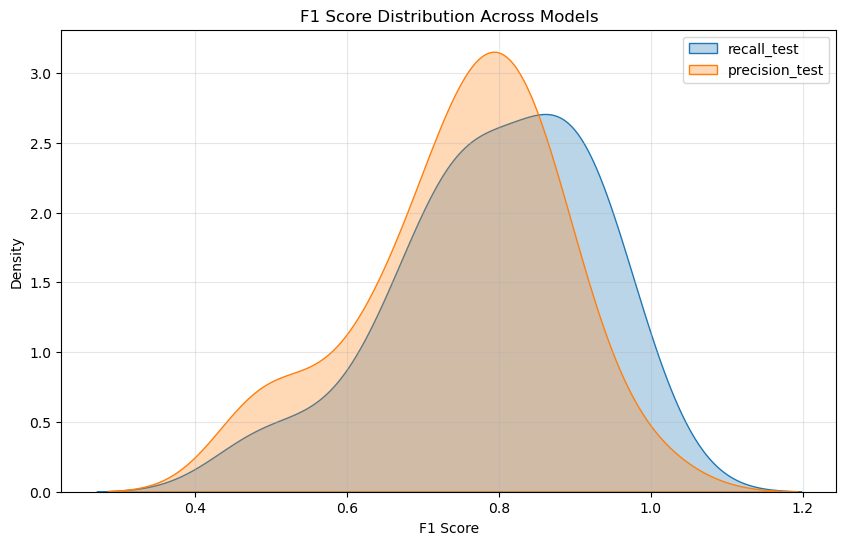

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

scores_plot = scores_per_model2

plt.figure(figsize=(10, 6))

for model_name, scores in zip(scores_plot["model_type"], scores_plot["scores_05"]):
    if model_name in ["StressClassifierWithFusion_two"]:
        df_plots = pd.DataFrame(scores)
        sns.kdeplot(df_plots['recall_test'], fill=True, label='recall_test', alpha=0.3)
        sns.kdeplot(df_plots['precision_test'], fill=True, label='precision_test', alpha=0.3)
        


plt.title('F1 Score Distribution Across Models')
plt.xlabel('F1 Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

<Axes: >

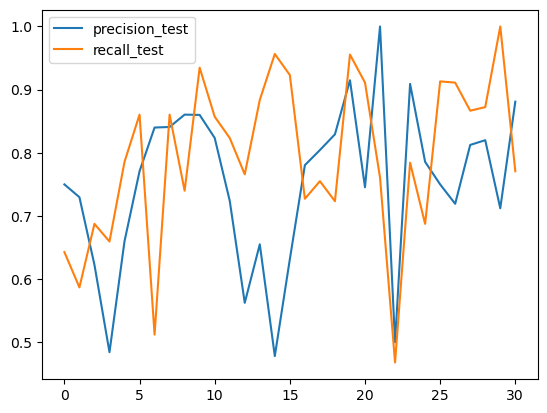

In [73]:
df_plots[['precision_test', 'recall_test']].plot()

In [77]:
df_plots.sort_values("f1_test", ascending=False)

,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train,test_name,threshold
19,0.933333,0.934783,0.955556,0.914894,0.812836,0.801521,0.777860,0.826667,S23_d1.pth,0.5
9,0.893617,0.895833,0.934783,0.860000,0.806463,0.810678,0.852290,0.772940,S12_d1.pth,0.5
21,0.876404,0.864198,0.760870,1.000000,0.770251,0.742880,0.683900,0.812994,S25_d1.pth,0.5
7,0.847059,0.850575,0.860465,0.840909,0.723694,0.737057,0.797347,0.685244,S10_d1.pth,0.5
28,0.835165,0.845361,0.872340,0.820000,0.753228,0.747245,0.751663,0.742878,S33_d1.pth,0.5
23,0.842105,0.842105,0.784314,0.909091,0.752874,0.760112,0.808006,0.717577,S27_d1.pth,0.5
10,0.831579,0.840000,0.857143,0.823529,0.718391,0.729655,0.783124,0.683021,S13_d1.pth,0.5
27,0.833333,0.838710,0.866667,0.812500,0.820724,0.816176,0.819188,0.813187,S32_d1.pth,0.5
29,0.815534,0.831858,1.000000,0.712121,0.766571,0.769231,0.798226,0.742268,S34_d1.pth,0.5
25,0.800000,0.823529,0.913043,0.750000,0.818573,0.805684,0.774742,0.839200,S29_d1.pth,0.5


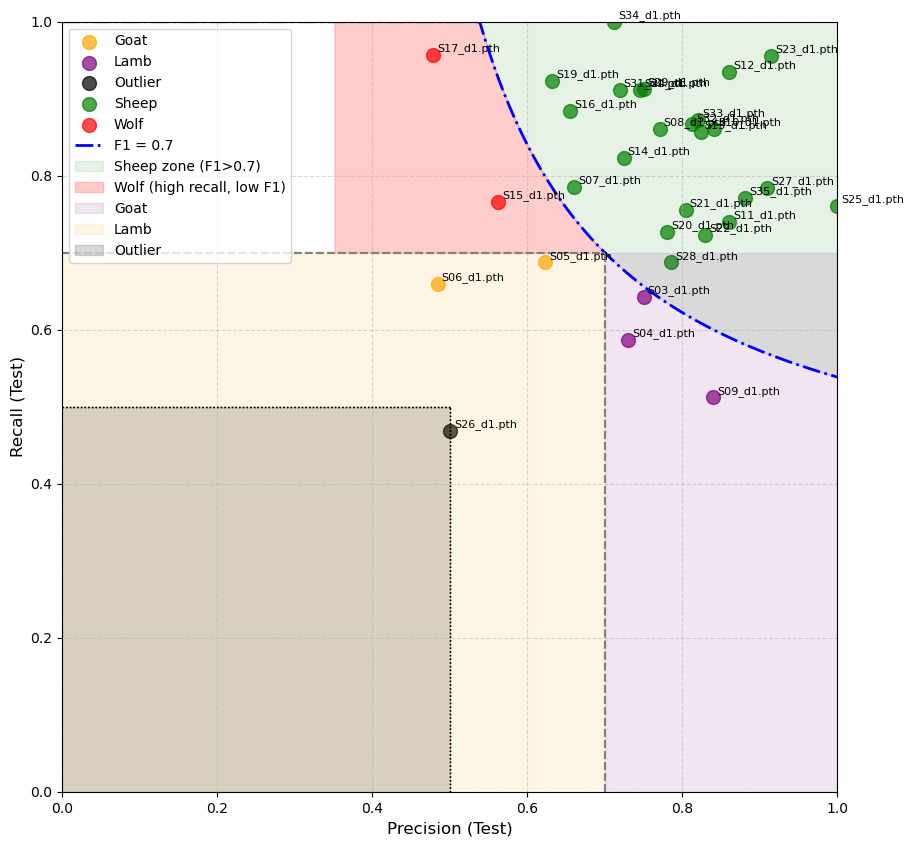

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df_plots

def zoo_animal(row):
    if row['f1_test'] > 0.7:
        return 'Sheep'
    elif row['f1_test'] < 0.5:
        return 'Outlier'
    elif row['precision_test'] >= 0.7 and row['recall_test'] >= 0.7:
        return 'Sheep'
    elif row['precision_test'] < 0.7 and row['recall_test'] >= 0.7:
        return 'Wolf'
    elif row['precision_test'] >= 0.7 and row['recall_test'] < 0.7:
        return 'Lamb'
    else:
        return 'Goat'

df['animal'] = df.apply(zoo_animal, axis=1)

color_map = {'Sheep':'green', 'Wolf':'red', 'Goat':'orange', 'Lamb':'purple', 'Outlier':'black'}


plt.figure(figsize=(10,10))

# Plot points
for animal, group in df.groupby('animal'):
    plt.scatter(group['precision_test'], group['recall_test'],
                s=100, c=color_map[animal], label=animal, alpha=0.7)

# Annotate participant IDs
for _, row in df.iterrows():
    plt.text(row['precision_test']+0.005, row['recall_test']+0.005, row['test_name'], fontsize=8)

p_thresh1, r_thresh1 = 0.7, 0.7
plt.hlines(y=r_thresh1, xmin=0, xmax=p_thresh1, colors='gray', linestyles='--')
plt.vlines(x=p_thresh1, ymin=0, ymax=r_thresh1, colors='gray', linestyles='--')

p_thresh2, r_thresh2 = 0.5, 0.5
plt.hlines(y=r_thresh2, xmin=0, xmax=p_thresh2, colors='black', linestyles=':', linewidth=1)
plt.vlines(x=p_thresh2, ymin=0, ymax=r_thresh2, colors='black', linestyles=':', linewidth=1)


# F1 = 0.7 line
precision_vals = np.linspace(0.00035, 1, 500)  # Precision > 0.35 to avoid division by zero
recall_vals = 0.7 * precision_vals / (2*precision_vals - 0.7)
recall_vals = np.clip(recall_vals, 0, 1)
recall_vals[precision_vals < 0.5] = 1
plt.plot(precision_vals, recall_vals, color='blue', linestyle='-.', linewidth=2, label='F1 = 0.7')

# precision_vals = np.linspace(0.01, 1, 500) 
# for f1_val, color in zip([0.5, 0.7], ['blue','darkblue']):
#     recall_vals = f1_val * precision_vals / (2*precision_vals - f1_val)
#     recall_vals = np.clip(recall_vals, 0, 1)
#     plt.plot(precision_vals, recall_vals, color=color, linestyle='-.', linewidth=2, label=f'F1 = {f1_val}')
# Example thresholds
p_thresh1, r_thresh1 = 0.7, 0.7
p_thresh2, r_thresh2 = 0.5, 0.5

# Sheep zone (F1 > 0.7 could be approximated by top-right)
plt.fill_between(precision_vals, recall_vals, 1, color='green', alpha=0.1, label="Sheep zone (F1>0.7)")
# Wolf zone (high recall, low precision)
precision_vals = np.linspace(0.001, 1, 500)

# F1 = 0.7 curve
recall_f1_07 = 0.7 * precision_vals / (2*precision_vals - 0.7)
recall_f1_07 = np.clip(recall_f1_07, 0, 1)

# F1 = 0.5 curve
recall_f1_05 = 0.5 * precision_vals / (2*precision_vals - 0.5)
recall_f1_05 = np.clip(recall_f1_05, 0, 1)
wolf_mask = (recall_f1_07 >= 0.7)
plt.fill_between(precision_vals[wolf_mask], 0.7, recall_f1_07[wolf_mask], 
                 color='red', alpha=0.2, label="Wolf (high recall, low F1)")


# Goat
plt.axvspan(p_thresh1, 1, ymin=0, ymax=r_thresh1, color='purple', alpha=0.1, label="Goat")

# Lamb zone
plt.axvspan(0, p_thresh1, ymin=0, ymax=r_thresh1, color='orange', alpha=0.1, label="Lamb")

# Outlier
plt.axvspan(0, p_thresh2, ymin=0, ymax=r_thresh2, color='black', alpha=0.15, label="Outlier")

plt.hlines(y=r_thresh1, xmin=0, xmax=p_thresh1, colors='gray', linestyles='--')
plt.vlines(x=p_thresh1, ymin=0, ymax=r_thresh1, colors='gray', linestyles='--')
plt.hlines(y=r_thresh2, xmin=0, xmax=p_thresh2, colors='black', linestyles=':', linewidth=1)
plt.vlines(x=p_thresh2, ymin=0, ymax=r_thresh2, colors='black', linestyles=':', linewidth=1)


plt.xlabel('Precision (Test)', fontsize=12)
plt.ylabel('Recall (Test)', fontsize=12)
# plt.title('Doddington Zoo: Precision–Recall with F1 Threshold Lines', fontsize=14)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_28396\3183608137.py:51: RuntimeWarning: divide by zero encountered in divide
  recall_vals = 0.7 * precision_vals / (2*precision_vals - 0.7)


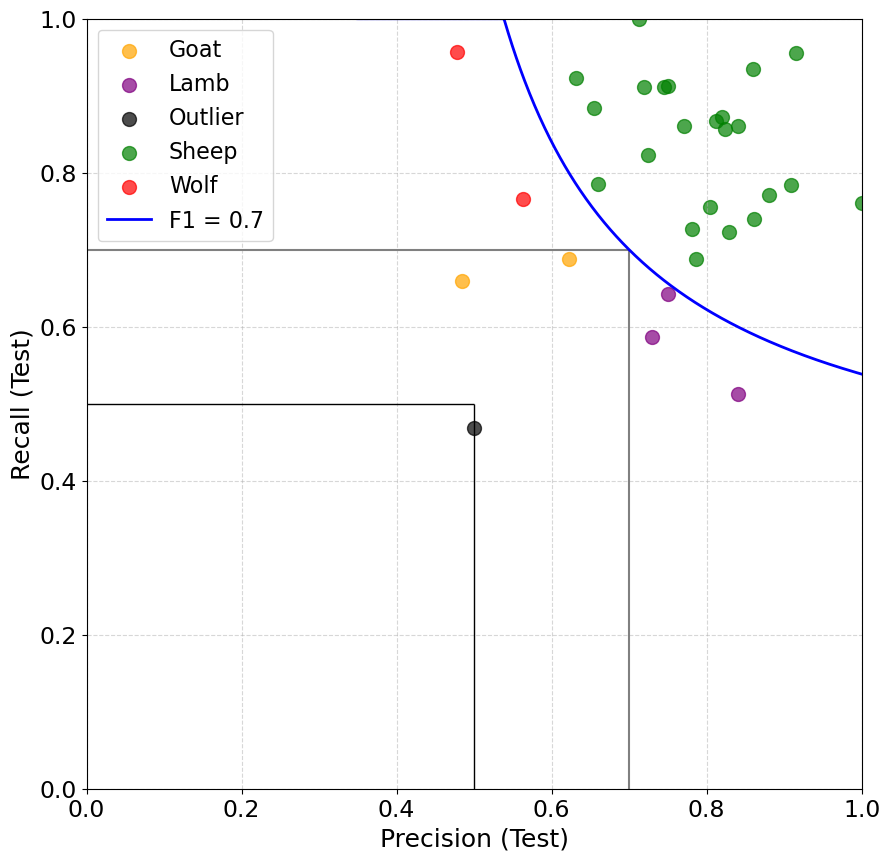

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df_plots

def zoo_animal(row):
    if row['f1_test'] > 0.7:
        return 'Sheep'
    elif row['f1_test'] < 0.5:
        return 'Outlier'
    elif row['precision_test'] >= 0.7 and row['recall_test'] >= 0.7:
        return 'Sheep'
    elif row['precision_test'] < 0.7 and row['recall_test'] >= 0.7:
        return 'Wolf'
    elif row['precision_test'] >= 0.7 and row['recall_test'] < 0.7:
    # elif row['recall_test'] < 0.7:
        return 'Lamb'
    else:
        return 'Goat'

df['animal'] = df.apply(zoo_animal, axis=1)

color_map = {'Sheep':'green', 'Wolf':'red', 'Goat':'orange', 'Lamb':'purple', 'Outlier':'black'}


plt.figure(figsize=(10,10))

# Plot points
for animal, group in df.groupby('animal'):
    plt.scatter(group['precision_test'], group['recall_test'],
                s=100, c=color_map[animal], label=animal, alpha=0.7)

# # Annotate participant IDs
# for _, row in df.iterrows():
#     plt.text(row['precision_test']+0.005, row['recall_test']+0.005, row['test_name'], fontsize=8)

# Precision/recall thresholds
p_thresh1, r_thresh1 = 0.7, 0.7
plt.hlines(y=r_thresh1, xmin=0, xmax=p_thresh1, colors='gray')
plt.vlines(x=p_thresh1, ymin=0, ymax=r_thresh1, colors='gray')

p_thresh2, r_thresh2 = 0.5, 0.5
plt.hlines(y=r_thresh2, xmin=0, xmax=p_thresh2, colors='black', linewidth=1)
plt.vlines(x=p_thresh2, ymin=0, ymax=r_thresh2, colors='black', linewidth=1)


# F1 = 0.7 line
precision_vals = np.linspace(0.35, 1, 500)  # Precision > 0.35 to avoid division by zero
recall_vals = 0.7 * precision_vals / (2*precision_vals - 0.7)
recall_vals = np.clip(recall_vals, 0, 1)
plt.plot(precision_vals, recall_vals, color='blue', linewidth=2, label='F1 = 0.7')

# precision_vals = np.linspace(0.3, 1, 500) 
# for f1_val, color in zip([0.5], ['black']):
#     recall_vals = f1_val * precision_vals / (2*precision_vals - f1_val)
#     recall_vals = np.clip(recall_vals, 0, 1)
#     plt.plot(precision_vals, recall_vals, color=color, linestyle='-', linewidth=2, label=f'F1 = {f1_val}')

plt.xlabel('Precision (Test)', fontsize=18)
plt.ylabel('Recall (Test)', fontsize=18)
# plt.title('Doddington Zoo: Precision–Recall with F1 Threshold Lines', fontsize=14)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5,)
# plt.legend()
plt.show()